In [15]:
###U.S. Trade Presentation - Lannon Grady portion


In [16]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
from pathlib import Path
import matplotlib.pyplot as plt

# Create a file path
exports_2013 = Path("Annual Trade Data/Exports/Total Export Value All Commodities 2013.csv")
exports_2014 = Path("Annual Trade Data/Exports/Total Export Value All Commodities 2014.csv")
exports_2015 = Path("Annual Trade Data/Exports/Total Export Value All Commodities 2015.csv")
exports_2016 = Path("Annual Trade Data/Exports/Total Export Value All Commodities 2016.csv")
exports_2017 = Path("Annual Trade Data/Exports/Total Export Value All Commodities 2017.csv")
exports_2018 = Path("Annual Trade Data/Exports/Total Export Value All Commodities 2018.csv")

In [17]:
# Read in the data. 
df_ex_13 = pd.read_csv(exports_2013)
df_ex_14 = pd.read_csv(exports_2014)
df_ex_15 = pd.read_csv(exports_2015)
df_ex_16 = pd.read_csv(exports_2016)
df_ex_17 = pd.read_csv(exports_2017)
df_ex_18 = pd.read_csv(exports_2018)
df_ex_18.head()

,EXPALL2018,COUNTRY,SCHEDULE
0,1233900863,Afghanistan,5310
1,59247055,Albania,4810
2,1250222221,Algeria,7210
3,3065762,Andorra,4271
4,526550201,Angola,7620


In [18]:
# Combine the data into a single dataset.
export_data_complete1 = pd.merge(df_ex_13, df_ex_14, how="inner", on=["COUNTRY","SCHEDULE"])

In [19]:
export_data_complete2 = pd.merge(df_ex_15, df_ex_16, how="inner", on=["COUNTRY","SCHEDULE"])

In [20]:
export_data_complete3 = pd.merge(df_ex_17, df_ex_18, how="inner", on=["COUNTRY","SCHEDULE"])

In [21]:
export_data_complete4 = pd.merge(export_data_complete1, export_data_complete2, how="inner", on=["COUNTRY","SCHEDULE"])

In [22]:
export_data_complete5 = pd.merge(export_data_complete4, export_data_complete3, how="inner", on=["COUNTRY","SCHEDULE"]).set_index("COUNTRY")

In [23]:
export_data_complete5

,EXPALL2013,SCHEDULE,EXPALL2014,EXPALL2015,EXPALL2016,EXPALL2017,EXPALL2018
COUNTRY,,,,,,,
Afghanistan,1410116220,5310,812720949,478711524,912724175,941428060,1233900863
Albania,74364825,4810,51256821,30897665,50293415,62086804,59247055
Algeria,1848703921,7210,2616922429,1875732769,2191261625,1059840617,1250222221
Andorra,5796907,4271,3789433,3336817,2830268,3285167,3065762
Angola,1443395524,7620,2039267110,1166094807,1249758184,809444868,526550201
...,...,...,...,...,...,...,...
Western Sahara,156076,7370,276987,32113,93983,418356,259989
Yemen,518251949,5210,368898721,158009761,170867053,199030638,195097586
Zambia,141148845,7940,114121914,84170835,81624741,85149483,195378641


In [24]:
working_data = export_data_complete5[["EXPALL2013","EXPALL2014","EXPALL2015","EXPALL2016","EXPALL2017","EXPALL2018"]].copy()
working_data

,EXPALL2013,EXPALL2014,EXPALL2015,EXPALL2016,EXPALL2017,EXPALL2018
COUNTRY,,,,,,
Afghanistan,1410116220,812720949,478711524,912724175,941428060,1233900863
Albania,74364825,51256821,30897665,50293415,62086804,59247055
Algeria,1848703921,2616922429,1875732769,2191261625,1059840617,1250222221
Andorra,5796907,3789433,3336817,2830268,3285167,3065762
Angola,1443395524,2039267110,1166094807,1249758184,809444868,526550201
...,...,...,...,...,...,...
Western Sahara,156076,276987,32113,93983,418356,259989
Yemen,518251949,368898721,158009761,170867053,199030638,195097586
Zambia,141148845,114121914,84170835,81624741,85149483,195378641


In [25]:
working_data.columns = ["2013", "2014", "2015", "2016", "2017", "2018"]

In [26]:
annual_export_totals = working_data.copy()
export_2013_sum = annual_export_totals["2013"].sum()
export_2014_sum = annual_export_totals["2014"].sum()
export_2015_sum = annual_export_totals["2015"].sum()
export_2016_sum = annual_export_totals["2016"].sum()
export_2017_sum = annual_export_totals["2017"].sum()
export_2018_sum = annual_export_totals["2018"].sum()
annual_export_totals

,2013,2014,2015,2016,2017,2018
COUNTRY,,,,,,
Afghanistan,1410116220,812720949,478711524,912724175,941428060,1233900863
Albania,74364825,51256821,30897665,50293415,62086804,59247055
Algeria,1848703921,2616922429,1875732769,2191261625,1059840617,1250222221
Andorra,5796907,3789433,3336817,2830268,3285167,3065762
Angola,1443395524,2039267110,1166094807,1249758184,809444868,526550201
...,...,...,...,...,...,...
Western Sahara,156076,276987,32113,93983,418356,259989
Yemen,518251949,368898721,158009761,170867053,199030638,195097586
Zambia,141148845,114121914,84170835,81624741,85149483,195378641


In [27]:
working_data_sorted = working_data.sort_values(by="2018", ascending = False)
working_data_sorted.head(11)

,2013,2014,2015,2016,2017,2018
COUNTRY,,,,,,
Canada,300754868974,312816950458,280855169199,266734465220,282265135262,298719019857
Mexico,225954367783,241007162317,236460137152,230051175309,243314438647,265010357329
China,121746188637,123657203406,115873365314,115545507660,129893586716,120341425641
Japan,65237414094,66891842650,62387809646,63226075952,67605076964,74966716044
United Kingdom,47361236230,53913170241,56094705824,55169322571,56257922547,66228171593
Germany,47363465586,49418841185,49978833642,49432133760,53896753486,57653807554
"Korea, South",41648727506,44649563379,43483975006,42312661833,48326408702,56344305789
Netherlands,42577045423,43141223376,40211651705,39605129181,41510332962,49390541239
Brazil,44105506964,42431727466,31640538352,30066298085,37221566249,39494176727


In [28]:
working_data_sorted_top10 = working_data_sorted.loc[working_data_sorted["2018"]>37000000000]
working_data_sorted_top10

,2013,2014,2015,2016,2017,2018
COUNTRY,,,,,,
Canada,300754868974,312816950458,280855169199,266734465220,282265135262,298719019857
Mexico,225954367783,241007162317,236460137152,230051175309,243314438647,265010357329
China,121746188637,123657203406,115873365314,115545507660,129893586716,120341425641
Japan,65237414094,66891842650,62387809646,63226075952,67605076964,74966716044
United Kingdom,47361236230,53913170241,56094705824,55169322571,56257922547,66228171593
Germany,47363465586,49418841185,49978833642,49432133760,53896753486,57653807554
"Korea, South",41648727506,44649563379,43483975006,42312661833,48326408702,56344305789
Netherlands,42577045423,43141223376,40211651705,39605129181,41510332962,49390541239
Brazil,44105506964,42431727466,31640538352,30066298085,37221566249,39494176727


In [29]:
working_data_sorted_top10.loc[:,"TTL Increase"] = (working_data_sorted_top10["2018"] - working_data_sorted_top10["2013"])
working_data_sorted_top10.loc[:,"% Increase"] = (((working_data_sorted_top10["2018"] / working_data_sorted_top10["2013"])-1)*100)
working_data_sorted_top10

C:\Users\lanno\AppData\Local\Temp\ipykernel_24128\3740771690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_data_sorted_top10.loc[:,"TTL Increase"] = (working_data_sorted_top10["2018"] - working_data_sorted_top10["2013"])
C:\Users\lanno\AppData\Local\Temp\ipykernel_24128\3740771690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_data_sorted_top10.loc[:,"% Increase"] = (((working_data_sorted_top10["2018"] / working_data_sorted_top10["2013"])-1)*100)


,2013,2014,2015,2016,2017,2018,TTL Increase,% Increase
COUNTRY,,,,,,,,
Canada,300754868974,312816950458,280855169199,266734465220,282265135262,298719019857,-2035849117,-0.676913
Mexico,225954367783,241007162317,236460137152,230051175309,243314438647,265010357329,39055989546,17.284901
China,121746188637,123657203406,115873365314,115545507660,129893586716,120341425641,-1404762996,-1.153846
Japan,65237414094,66891842650,62387809646,63226075952,67605076964,74966716044,9729301950,14.913684
United Kingdom,47361236230,53913170241,56094705824,55169322571,56257922547,66228171593,18866935363,39.836239
Germany,47363465586,49418841185,49978833642,49432133760,53896753486,57653807554,10290341968,21.726328
"Korea, South",41648727506,44649563379,43483975006,42312661833,48326408702,56344305789,14695578283,35.284579
Netherlands,42577045423,43141223376,40211651705,39605129181,41510332962,49390541239,6813495816,16.002745
Brazil,44105506964,42431727466,31640538352,30066298085,37221566249,39494176727,-4611330237,-10.455226


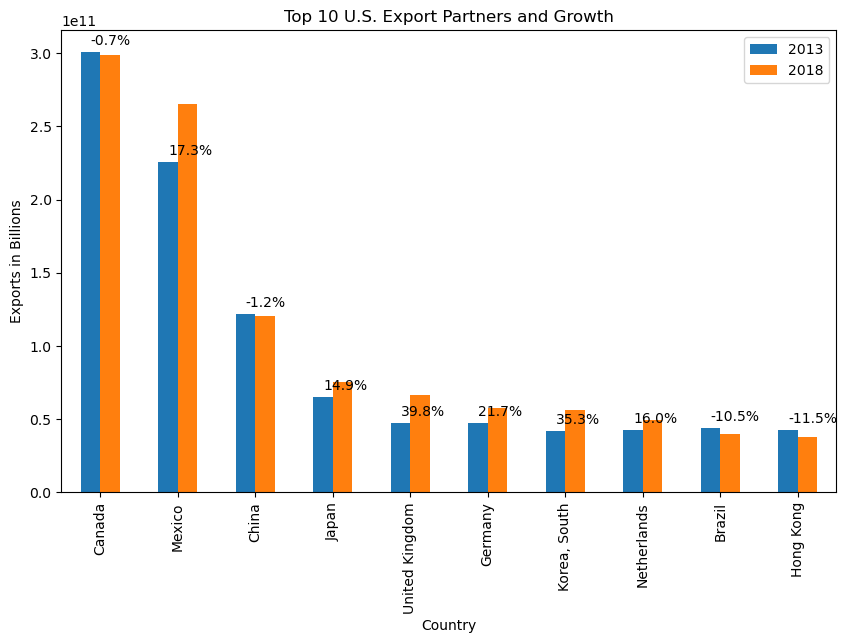

In [30]:
ax = working_data_sorted_top10.plot.bar(y=["2013","2018"], figsize=(10, 6))
# Loop over each bar and annotate with the "% Increase" value
for i, bar in enumerate(ax.patches):
    # Determine the correct "% Increase" value to display
    if i < len(working_data_sorted_top10):
        # Select the "% Increase" value for the corresponding country
        increase = working_data_sorted_top10["% Increase"].iloc[i % len(working_data_sorted_top10)]
        
        # Set the annotation at the top of each bar
        ax.annotate(f"{increase:.1f}%",  # Format to 1 decimal place if needed
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Positioning at the bar's top
                    ha="left", va="bottom", xytext=(0, 3), textcoords="offset points")
plt.title("Top 10 U.S. Export Partners and Growth")
plt.xlabel("Country")
plt.ylabel("Exports in Billions")
plt.show()

In [31]:
# Create a file path
imports_2013 = Path("Annual Trade Data/Imports/General Imports Customs Value, All Commodities 2013.csv")
imports_2014 = Path("Annual Trade Data/Imports/General Imports Customs Value, All Commodities 2014.csv")
imports_2015 = Path("Annual Trade Data/Imports/General Imports Customs Value, All Commodities 2015.csv")
imports_2016 = Path("Annual Trade Data/Imports/General Imports Customs Value, All Commodities 2016.csv")
imports_2017 = Path("Annual Trade Data/Imports/General Imports Customs Value, All Commodities 2017.csv")
imports_2018 = Path("Annual Trade Data/Imports/General Imports Customs Value, All Commodities 2018.csv")

In [32]:
# Read in the data. 
df_imp_13 = pd.read_csv(imports_2013)
df_imp_14 = pd.read_csv(imports_2014)
df_imp_15 = pd.read_csv(imports_2015)
df_imp_16 = pd.read_csv(imports_2016)
df_imp_17 = pd.read_csv(imports_2017)
df_imp_18 = pd.read_csv(imports_2018)
df_imp_18.head()

,IMPALL2018,COUNTRY,SCHEDULE
0,28915075,Afghanistan,5310
1,68025429,Albania,4810
2,4618350007,Algeria,7210
3,16013879,Andorra,4271
4,2698363854,Angola,7620


In [33]:
# Combine the data into a single dataset.
import_data_complete1 = pd.merge(df_imp_13, df_imp_14, how="inner", on=["COUNTRY","SCHEDULE"])

In [34]:
import_data_complete2 = pd.merge(df_imp_15, df_imp_16, how="inner", on=["COUNTRY","SCHEDULE"])

In [35]:
import_data_complete3 = pd.merge(df_imp_17, df_imp_18, how="inner", on=["COUNTRY","SCHEDULE"])

In [36]:
import_data_complete4 = pd.merge(import_data_complete1, import_data_complete2, how="inner", on=["COUNTRY","SCHEDULE"])

In [37]:
import_data_complete5 = pd.merge(import_data_complete4, import_data_complete3, how="inner", on=["COUNTRY","SCHEDULE"]).set_index("COUNTRY")

In [38]:
import_data_complete5

,IMPALL2013,SCHEDULE,IMPALL2014,IMPALL2015,IMPALL2016,IMPALL2017,IMPALL2018
COUNTRY,,,,,,,
Afghanistan,45514058,5310,74496178,23601251,33715666,14423622,28915075
Albania,22776586,4810,69128617,160081219,124614040,41596733,68025429
Algeria,4830871545,7210,4628902129,3371547769,3227920172,3805619792,4618350007
Andorra,1428673,4271,1277355,4847957,6610069,13694429,16013879
Angola,8742942417,7620,5719811538,2806494883,2855572443,2603653399,2698363854
...,...,...,...,...,...,...,...
Western Sahara,710261,7370,125008,44063,82582,18413,89068
Yemen,65593850,5210,40915509,48270876,2396259,9542905,2164858
Zambia,37700326,7940,55669752,47114386,46555995,66050933,182738460


In [39]:
import_data = import_data_complete5[["IMPALL2013","IMPALL2014","IMPALL2015","IMPALL2016","IMPALL2017","IMPALL2018"]].copy()
import_data

,IMPALL2013,IMPALL2014,IMPALL2015,IMPALL2016,IMPALL2017,IMPALL2018
COUNTRY,,,,,,
Afghanistan,45514058,74496178,23601251,33715666,14423622,28915075
Albania,22776586,69128617,160081219,124614040,41596733,68025429
Algeria,4830871545,4628902129,3371547769,3227920172,3805619792,4618350007
Andorra,1428673,1277355,4847957,6610069,13694429,16013879
Angola,8742942417,5719811538,2806494883,2855572443,2603653399,2698363854
...,...,...,...,...,...,...
Western Sahara,710261,125008,44063,82582,18413,89068
Yemen,65593850,40915509,48270876,2396259,9542905,2164858
Zambia,37700326,55669752,47114386,46555995,66050933,182738460


In [40]:
import_data.columns = ["2013", "2014", "2015", "2016", "2017", "2018"]
annual_import_totals = import_data.copy()
import_2013_sum = annual_import_totals["2013"].sum()
import_2014_sum = annual_import_totals["2014"].sum()
import_2015_sum = annual_import_totals["2015"].sum()
import_2016_sum = annual_import_totals["2016"].sum()
import_2017_sum = annual_import_totals["2017"].sum()
import_2018_sum = annual_import_totals["2018"].sum()
annual_import_totals

,2013,2014,2015,2016,2017,2018
COUNTRY,,,,,,
Afghanistan,45514058,74496178,23601251,33715666,14423622,28915075
Albania,22776586,69128617,160081219,124614040,41596733,68025429
Algeria,4830871545,4628902129,3371547769,3227920172,3805619792,4618350007
Andorra,1428673,1277355,4847957,6610069,13694429,16013879
Angola,8742942417,5719811538,2806494883,2855572443,2603653399,2698363854
...,...,...,...,...,...,...
Western Sahara,710261,125008,44063,82582,18413,89068
Yemen,65593850,40915509,48270876,2396259,9542905,2164858
Zambia,37700326,55669752,47114386,46555995,66050933,182738460


In [41]:
import_data_sorted = import_data.sort_values(by="2018", ascending = False)
import_data_sorted.head(11)

,2013,2014,2015,2016,2017,2018
COUNTRY,,,,,,
China,440430019592,468474894856,483201655364,462542004554,505469954379,539503427742
Mexico,280556040242,295729962846,296433325024,293923947660,314267299235,346527738621
Canada,332503645324,349286122826,296305080863,277782254650,299319385870,318481082527
Japan,138575341868,134504542819,131445490188,132030346544,136480825868,142596248051
Germany,114341899964,124181984009,124887804524,114107089169,117575227374,125904141782
"Korea, South",62370452198,69676890586,71775318803,69895323002,71444246147,74290678954
United Kingdom,52741231492,54689496275,58057103977,54270868797,53060325659,60811973270
Ireland,31496458639,33987624106,39351379107,45526833649,48796831056,57469105834
Italy,38708799040,42377879302,44220552948,45291969048,49917515702,54722268117


In [42]:
import_data_sorted_top10 = import_data_sorted.loc[import_data_sorted["2018"]>54000000000]
import_data_sorted_top10

,2013,2014,2015,2016,2017,2018
COUNTRY,,,,,,
China,440430019592,468474894856,483201655364,462542004554,505469954379,539503427742
Mexico,280556040242,295729962846,296433325024,293923947660,314267299235,346527738621
Canada,332503645324,349286122826,296305080863,277782254650,299319385870,318481082527
Japan,138575341868,134504542819,131445490188,132030346544,136480825868,142596248051
Germany,114341899964,124181984009,124887804524,114107089169,117575227374,125904141782
"Korea, South",62370452198,69676890586,71775318803,69895323002,71444246147,74290678954
United Kingdom,52741231492,54689496275,58057103977,54270868797,53060325659,60811973270
Ireland,31496458639,33987624106,39351379107,45526833649,48796831056,57469105834
Italy,38708799040,42377879302,44220552948,45291969048,49917515702,54722268117


In [43]:
import_data_sorted_top10.loc[:,"TTL Increase"] = (import_data_sorted_top10["2018"] - import_data_sorted_top10["2013"])
import_data_sorted_top10.loc[:,"% Increase"] = (((import_data_sorted_top10["2018"] / import_data_sorted_top10["2013"])-1)*100)
import_data_sorted_top10

C:\Users\lanno\AppData\Local\Temp\ipykernel_24128\2691390413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import_data_sorted_top10.loc[:,"TTL Increase"] = (import_data_sorted_top10["2018"] - import_data_sorted_top10["2013"])
C:\Users\lanno\AppData\Local\Temp\ipykernel_24128\2691390413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import_data_sorted_top10.loc[:,"% Increase"] = (((import_data_sorted_top10["2018"] / import_data_sorted_top10["2013"])-1)*100)


,2013,2014,2015,2016,2017,2018,TTL Increase,% Increase
COUNTRY,,,,,,,,
China,440430019592,468474894856,483201655364,462542004554,505469954379,539503427742,99073408150,22.494699
Mexico,280556040242,295729962846,296433325024,293923947660,314267299235,346527738621,65971698379,23.514624
Canada,332503645324,349286122826,296305080863,277782254650,299319385870,318481082527,-14022562797,-4.217266
Japan,138575341868,134504542819,131445490188,132030346544,136480825868,142596248051,4020906183,2.901603
Germany,114341899964,124181984009,124887804524,114107089169,117575227374,125904141782,11562241818,10.111990
"Korea, South",62370452198,69676890586,71775318803,69895323002,71444246147,74290678954,11920226756,19.111977
United Kingdom,52741231492,54689496275,58057103977,54270868797,53060325659,60811973270,8070741778,15.302528
Ireland,31496458639,33987624106,39351379107,45526833649,48796831056,57469105834,25972647195,82.462119
Italy,38708799040,42377879302,44220552948,45291969048,49917515702,54722268117,16013469077,41.369067


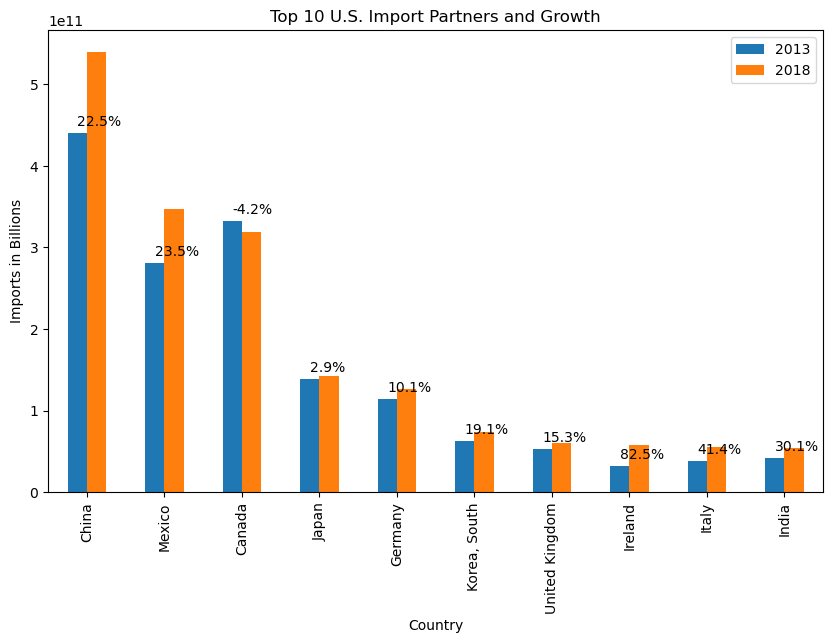

In [44]:
imp_ax = import_data_sorted_top10.plot.bar(y=["2013","2018"], figsize=(10, 6))
# Loop over each bar and annotate with the "% Increase" value
for i, bar in enumerate(imp_ax.patches):
    # Determine the correct "% Increase" value to display
    if i < len(import_data_sorted_top10):
        # Select the "% Increase" value for the corresponding country
        increase = import_data_sorted_top10["% Increase"].iloc[i % len(import_data_sorted_top10)]
        
        # Set the annotation at the top of each bar
        imp_ax.annotate(f"{increase:.1f}%",  # Format to 1 decimal place if needed
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Positioning at the bar's top
                    ha="left", va="bottom", xytext=(0, 3), textcoords="offset points")
plt.title("Top 10 U.S. Import Partners and Growth")
plt.xlabel("Country")
plt.ylabel("Imports in Billions")
plt.show()

In [48]:
working_data_sorted_top10.loc[:,"2014 % Increase"] = (((working_data_sorted_top10["2014"] / working_data_sorted_top10["2013"])-1)*100)
working_data_sorted_top10.loc[:,"2015 % Increase"] = (((working_data_sorted_top10["2015"] / working_data_sorted_top10["2014"])-1)*100)
working_data_sorted_top10.loc[:,"2016 % Increase"] = (((working_data_sorted_top10["2016"] / working_data_sorted_top10["2015"])-1)*100)
working_data_sorted_top10.loc[:,"2017 % Increase"] = (((working_data_sorted_top10["2017"] / working_data_sorted_top10["2016"])-1)*100)
working_data_sorted_top10.loc[:,"2018 % Increase"] = (((working_data_sorted_top10["2018"] / working_data_sorted_top10["2017"])-1)*100)
working_data_sorted_top10

,2013,2014,2015,2016,2017,2018,TTL Increase,% Increase,2014 % Increase,2015 % Increase,2016 % Increase,2017 % Increase,2018 % Increase
COUNTRY,,,,,,,,,,,,,
Canada,300754868974,312816950458,280855169199,266734465220,282265135262,298719019857,-2035849117,-0.676913,4.010602,-10.217407,-5.027753,5.822521,5.829230
Mexico,225954367783,241007162317,236460137152,230051175309,243314438647,265010357329,39055989546,17.284901,6.661874,-1.886676,-2.710377,5.765353,8.916823
China,121746188637,123657203406,115873365314,115545507660,129893586716,120341425641,-1404762996,-1.153846,1.569671,-6.294690,-0.282945,12.417687,-7.353836
Japan,65237414094,66891842650,62387809646,63226075952,67605076964,74966716044,9729301950,14.913684,2.536012,-6.733307,1.343638,6.925941,10.889181
United Kingdom,47361236230,53913170241,56094705824,55169322571,56257922547,66228171593,18866935363,39.836239,13.833959,4.046387,-1.649680,1.973198,17.722391
Germany,47363465586,49418841185,49978833642,49432133760,53896753486,57653807554,10290341968,21.726328,4.339580,1.133156,-1.093863,9.031817,6.970836
"Korea, South",41648727506,44649563379,43483975006,42312661833,48326408702,56344305789,14695578283,35.284579,7.205108,-2.610526,-2.693666,14.212641,16.591130
Netherlands,42577045423,43141223376,40211651705,39605129181,41510332962,49390541239,6813495816,16.002745,1.325075,-6.790655,-1.508325,4.810498,18.983727
Brazil,44105506964,42431727466,31640538352,30066298085,37221566249,39494176727,-4611330237,-10.455226,-3.794944,-25.431887,-4.975390,23.798301,6.105628


In [49]:
percent_export_increases = working_data_sorted_top10[["2014 % Increase","2015 % Increase","2016 % Increase","2017 % Increase","2018 % Increase","TTL Increase"]].copy()
percent_export_increases.columns = ["2014", "2015", "2016", "2017", "2018", "TTL Increase"]
percent_export_increases

,2014,2015,2016,2017,2018,TTL Increase
COUNTRY,,,,,,
Canada,4.010602,-10.217407,-5.027753,5.822521,5.829230,-2035849117
Mexico,6.661874,-1.886676,-2.710377,5.765353,8.916823,39055989546
China,1.569671,-6.294690,-0.282945,12.417687,-7.353836,-1404762996
Japan,2.536012,-6.733307,1.343638,6.925941,10.889181,9729301950
United Kingdom,13.833959,4.046387,-1.649680,1.973198,17.722391,18866935363
Germany,4.339580,1.133156,-1.093863,9.031817,6.970836,10290341968
"Korea, South",7.205108,-2.610526,-2.693666,14.212641,16.591130,14695578283
Netherlands,1.325075,-6.790655,-1.508325,4.810498,18.983727,6813495816
Brazil,-3.794944,-25.431887,-4.975390,23.798301,6.105628,-4611330237


<Axes: xlabel='COUNTRY'>

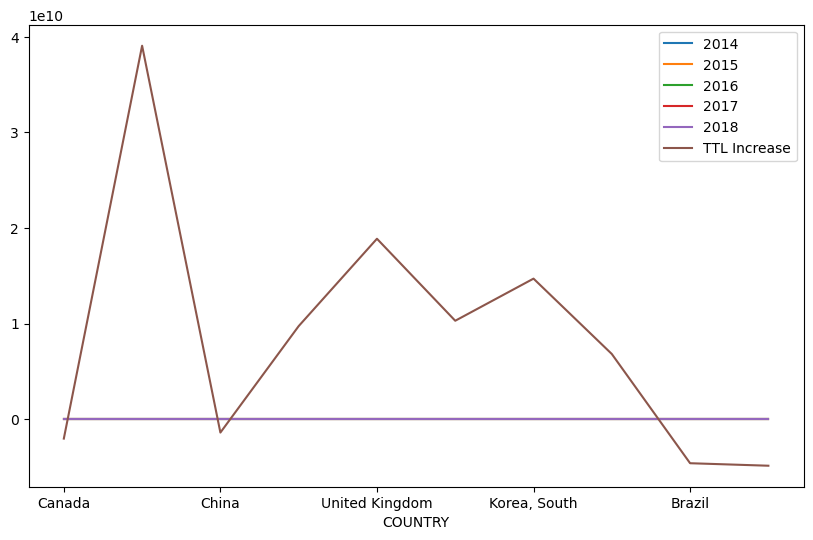

In [50]:
percent_export_increases.plot(figsize=(10, 6))

In [61]:
us_total_data = {"Imports": [import_2013_sum, import_2014_sum, import_2015_sum, import_2016_sum,import_2017_sum, import_2018_sum], "Exports":[export_2013_sum,export_2014_sum,export_2015_sum,export_2016_sum,export_2017_sum,export_2018_sum]}
us_index = ["2013", "2014", "2015", "2016", "2017", "2018"] 
us_total_df = pd.DataFrame(us_total_data, index=us_index)
print(us_total_df)

            Imports        Exports
2013  2267986733622  1578516879950
2014  2356356072353  1621873792910
2015  2248811351481  1503328349746
2016  2187600097145  1451023529686
2017  2341962734469  1546272961061
2018  2542733263436  1664055580908


In [62]:
# Calculate the variance between Exports and Imports
us_total_df["Variance"] = us_total_df["Exports"] - us_total_df["Imports"]

print(us_total_df)

            Imports        Exports      Variance
2013  2267986733622  1578516879950 -689469853672
2014  2356356072353  1621873792910 -734482279443
2015  2248811351481  1503328349746 -745483001735
2016  2187600097145  1451023529686 -736576567459
2017  2341962734469  1546272961061 -795689773408
2018  2542733263436  1664055580908 -878677682528


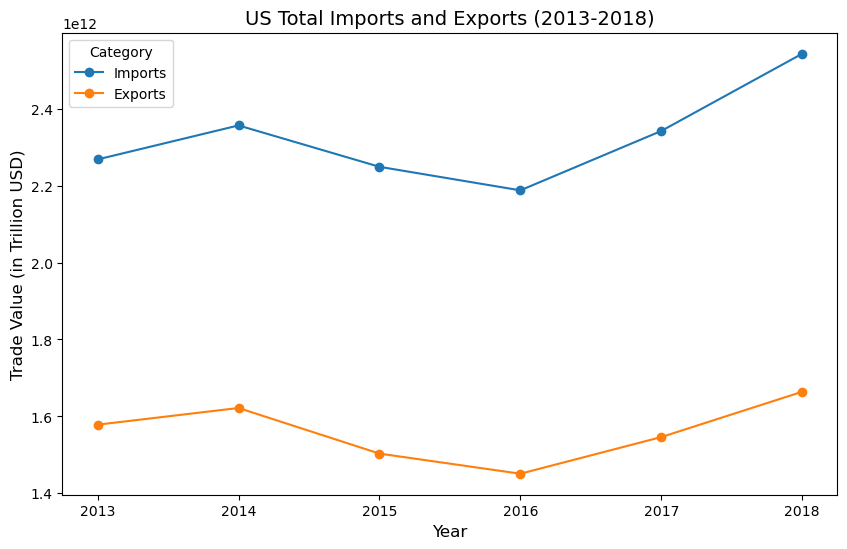

In [64]:
# Create the line chart
ax = us_total_df[["Imports","Exports"]].plot(kind="line", figsize=(10, 6), marker="o")

# Adding data labels and legend
ax.set_title("US Total Imports and Exports (2013-2018)", fontsize=14)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Trade Value (in Trillion USD)", fontsize=12)
ax.legend(title="Category", fontsize=10)
ax.grid(False)

# Show the chart
plt.show()